In [1]:
import pandas as pd
df = pd.read_csv('/home/anikait.singh/hint_merge/aime_joint_sft_hints.csv')
df

,problem,hints,answer,corrects,scores
0,Find the sum of all integer bases $b>9$ for wh...,['\n <note>\n <description>Any base‐repres...,70,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0.250
1,In $\triangle ABC$ points $D$ and $E$ lie on $...,['\n <note>\n <description>Use the reflect...,588,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0.125
2,The $9$ members of a baseball team went to an ...,['\n <note>\n <description>When distributi...,16,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.125
3,"Find the number of ordered pairs $(x,y)$, wher...",['\n <note>\n <description>Use the discrim...,117,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",0.125
4,There are $8!= 40320$ eight-digit positive int...,['\n <note>\n <description>When a problem ...,279,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000
5,An isosceles trapezoid has an inscribed circle...,['\n <note>\n <description>In a tangential...,504,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000
6,"The twelve letters $A$,$B$,$C$,$D$,$E$,$F$,$G$...","[""\n <note>\n <description>When selecting ...",821,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000
7,Let $k$ be a real number such that the system ...,"[""\n <note>\n <description>Interpret the m...",77,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.125
8,The parabola with equation $y = x^2 - 4$ is ro...,['\n <note>\n <description>When a curve is...,62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000
9,The $27$ cells of a $3 \times 9$ grid are fill...,"[""\n <note>\n <description>Use the Fundame...",81,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000


In [2]:
import numpy as np
def pass_at_k(n, c, k):
    """
    :param n: total number of samples
    :param c: number of correct samples
    :param k: k in pass@$k$
    """
    if n - c < k:
        return 1.0
    return 1.0 - np.prod(1.0 - k / np.arange(n - c + 1, n + 1))

In [3]:
all_pass_k = []
for i, row in df.iterrows():
    curr_pass_k = []
    corrects = eval(row['corrects'])
    num_correct = sum(corrects)
    total_hints = len(corrects)
    for k in range(1, total_hints + 1):
        curr_pass_k.append(pass_at_k(total_hints, num_correct, k))
    all_pass_k.append(curr_pass_k)
all_pass_k = np.array(all_pass_k).mean(axis=0)
all_pass_k

array([0.03333333, 0.06547619, 0.09642857, 0.12619048, 0.1547619 ,
       0.18214286, 0.20833333, 0.23333333])

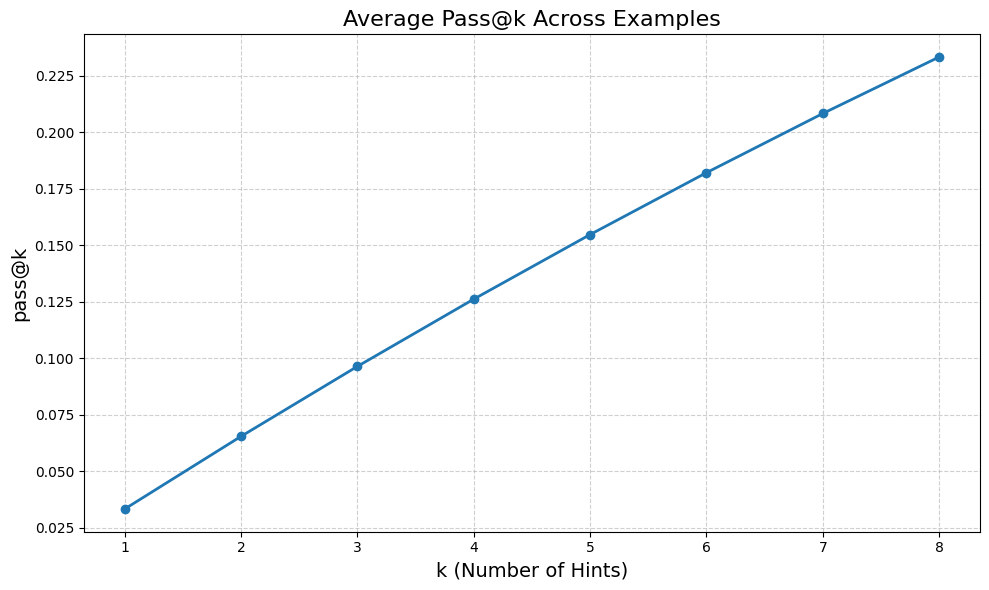

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and pass_at_k is defined
# Compute average pass@k
all_pass_k = []
for _, row in df.iterrows():
    curr_pass_k = []
    corrects = eval(row['corrects'])  # Use with caution: prefer `ast.literal_eval` if possible
    num_correct = sum(corrects)
    total_hints = len(corrects)
    for k in range(1, total_hints + 1):
        curr_pass_k.append(pass_at_k(total_hints, num_correct, k))
    all_pass_k.append(curr_pass_k)

mean_pass_k = np.array(all_pass_k).mean(axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mean_pass_k) + 1), mean_pass_k, marker='o', linewidth=2)
plt.title('Average Pass@k Across Examples', fontsize=16)
plt.xlabel('k (Number of Hints)', fontsize=14)
plt.ylabel('pass@k', fontsize=14)
plt.xticks(range(1, len(mean_pass_k) + 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()